# Boston Housing Data

## Load The Housing Data

In [151]:
#Load the libraries 
#import piplite
#await piplite.install(['numpy'],['pandas'])

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm


In [3]:
#Download the housing data
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

## Task 1: Explore the Data
The following describes the dataset variables:

·      CRIM - per capita crime rate by town

·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

·      INDUS - proportion of non-retail business acres per town.

·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

·      NOX - nitric oxides concentration (parts per 10 million)

·      RM - average number of rooms per dwelling

·      AGE - proportion of owner-occupied units built prior to 1940

·      DIS - weighted distances to five Boston employment centres

·      RAD - index of accessibility to radial highways

·      TAX - full-value property-tax rate per $10,000

·      PTRATIO - pupil-teacher ratio by town

·      LSTAT - % lower status of the population

·      MEDV - Median value of owner-occupied homes in $1000's



In [38]:
#Find the basic statistics
boston_df.head()


,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


## Task 2: Generate Descriptive Statistics and Visualizations
For all visualizations, please include a title in each graph and appropriate labels

Generate the following and explain your findings:

For the "Median value of owner-occupied homes" provide a boxplot

Provide a  bar plot for the Charles river variable

Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you sa  about the re 
ationship?

Create a histogram for the pupil to teacher r




### ***Scatter Plot is Second before last
atio variable

## Median Value Boxplot

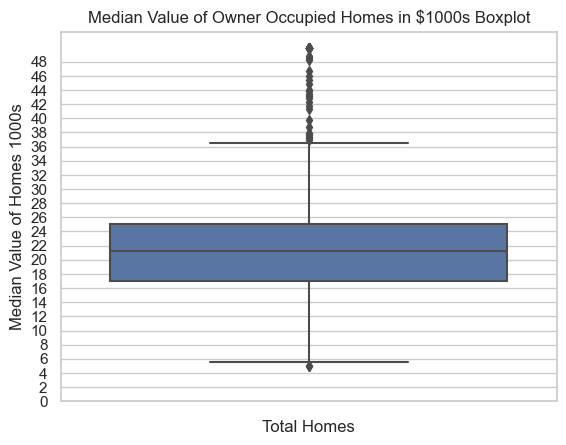

Explanation:The majority of the owner occupied homes are between $20,0000 and $22,000 dollars.


In [184]:
#Make a boxplot of Median value of owner occupied homes.
ax = sns.boxplot(y = 'MEDV', data=boston_df)
plt.title('Median Value of Owner Occupied Homes in $1000s Boxplot')
plt.yticks(np.arange(0,50,2))
plt.ylabel('Median Value of Homes 1000s')
plt.xlabel('Total Homes')
plt.show()

print ('Explanation:The majority of the owner occupied homes are between $20,0000 and $22,000 dollars.')

## Charles River Boxplot

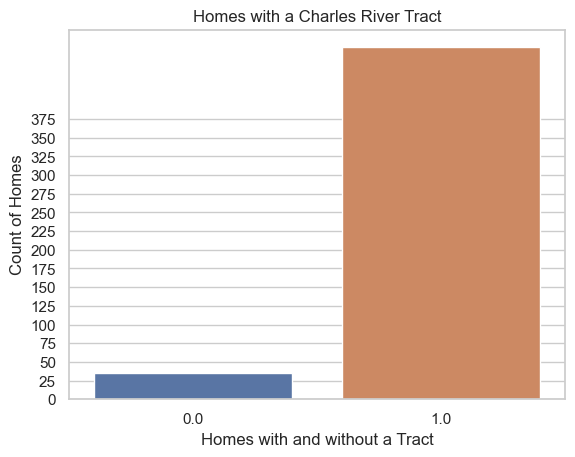

Explanation: There apears to be over 400 Homes without a Charles River Tract and just over 25 homes with a Charles River Tract.


In [162]:
unique_CHAS = boston_df['CHAS'].unique()
CHAS_counts = boston_df['CHAS'].value_counts()

sns.set(style='whitegrid')
ax = sns.barplot(y = CHAS_counts, x = unique_CHAS)
plt.title('Homes with a Charles River Tract')
plt.ylabel('Count of Homes')
plt.xlabel('Homes with and without a Tract')
plt.yticks(np.arange(0,400,25))
plt.show()

print('Explanation: There apears to be over 400 Homes without a Charles River Tract and just over 25 homes with a Charles River Tract.')

## MEDV vs AGE Boxplot

In [98]:
#Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older
boston_df.loc[(boston_df['AGE'] <= 35.0), 'age_group'] = '35 years or younger'
boston_df.loc[(boston_df['AGE'] > 35.0) & (boston_df['AGE'] <70.0), 'age_group'] = 'between 35 and 70 years old'
boston_df.loc[(boston_df['AGE'] >= 70.0), 'age_group'] = '70 years and older'


In [103]:
boston_df['age_group'].unique()

array(['70 years and older', 'nan'], dtype=object)

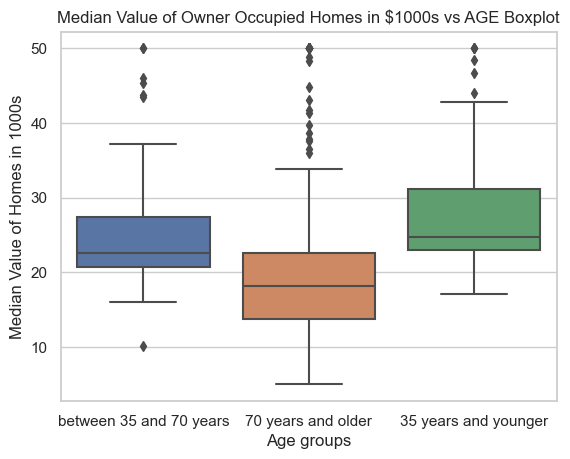

Explanations: Homes younger than 35 years old and younger have higher median values, followed by those 35 to 70, and homes older than 70 years old hav ethe lowest median values


In [167]:
#Make a box plot of MEDV vs AGE.
ax = sns.boxplot(y = 'MEDV', x='age_group', data=boston_df)
plt.title('Median Value of Owner Occupied Homes in $1000s vs AGE Boxplot')
plt.ylabel('Median Value of Homes in 1000s')
plt.xlabel('Age groups')
plt.show()

print('Explanations: Homes younger than 35 years old and younger have higher median values, followed by those 35 to 70, and homes older than 70 years old hav ethe lowest median values')

## Pupil Teacher Histogram

C:\Users\cmesc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


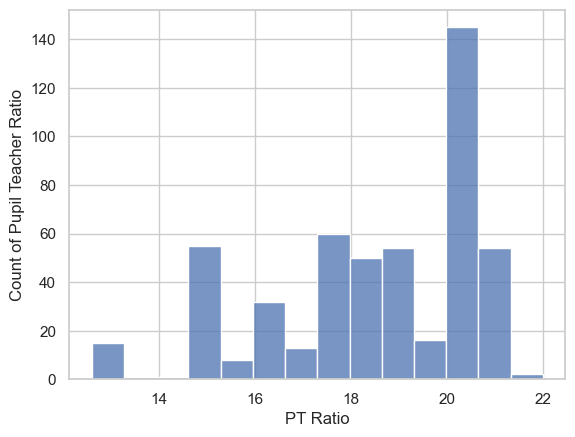

The highest frequency of PTRatios between 20 to 21 appear to be the most common meaning most homes are located in an area where the pupil to teacher ratio is around 21 pupils to each teacher.


In [187]:
#Histogram
ax = sns.histplot(x='PTRATIO', data=boston_df)
plt.ylabel('Count of Pupil Teacher Ratio')
plt.xlabel('PT Ratio')
plt.show()

print('The highest frequency of PTRatios between 20 to 21 appear to be the most common meaning most homes are located in an area where the pupil to teacher ratio is around 21 pupils to each teacher.') 

## Nitric Oxide Scatter Plot

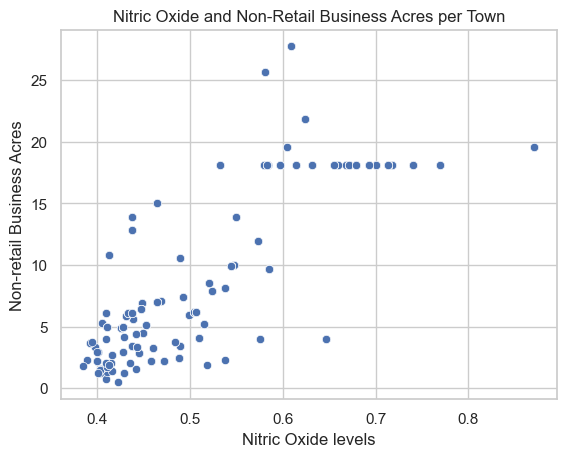

Explanation: As non-retail business acres per town increases so does nitric oxide levels. The highest levels are seen around 25+ acres.


In [169]:
#Scatter plot to show nitric oxide and non-retail business acres per town

ax = sns.scatterplot(x = 'NOX', y= 'INDUS', data = boston_df)
plt.title('Nitric Oxide and Non-Retail Business Acres per Town')
plt.xlabel('Nitric Oxide levels')
plt.ylabel('Non-retail Business Acres')
plt.show()

print('Explanation: As non-retail business acres per town increases so does nitric oxide levels. The highest levels are seen around 25+ acres.')

## Task 3: Use the appropriate tests to answer the questions provided.
For each of the following questions;

Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

Be sure to:

State your hypothesis.

Use α = 0.05

Perform the test Statistics.

State the conclusion from the test.

## T-test CHAS vs MEDV

In [175]:
#Statistical significance difference between median value of houses bounded by the Charles river

#boston_df['CHAS'] = boston_df['CHAS'].replace({1.0:'Bounded', 0.0:'UnBounded'})
#boston_df['CHAS'] = boston_df['CHAS'].replace({'Bounded':1.0, 'UnBounded':0.0})
#boston_df['CHAS'].unique()
#print(boston_df['CHAS'])

#Perform the t-test.
t_test = scipy.stats.ttest_ind(boston_df[boston_df['CHAS']==0.0]['MEDV'], boston_df[boston_df['CHAS']==1.0]['MEDV'], equal_var = True)

print(t_test)
print('Null Hypothesis: There is no statistical difference between the median value of houses bounded by the river.')
print('Alt Hypothesis: There is a statistical difference.') 
print('Conclusion: With a pvalue than 0.05 there is a statistically significant difference between the the houses bounded by the river.') 

TtestResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)
Null Hypothesis: There is no statistical difference between the median value of houses bounded by the river.
Alt Hypothesis: There is a statistical difference.
Conclusion: With a pvalue than 0.05 there is a statistically significant difference between the the houses bounded by the river.


## ANNOVA Before 1940 vs After 1940

In [189]:
#Is there a difference in the Median values of houses for each proportion of owner occupied units built prior to 1940?


#Determine the current year
year = 2024
target_year = 1940
year_diff = year - target_year
#print(year_diff)

#Seperate the data between before 1940 and after 1940.
boston_df.loc[(boston_df['AGE'] > 84.0), 'age_group2'] = 'Before 1940'
boston_df.loc[(boston_df['AGE'] < 84.0), 'age_group2'] = 'After 1940'

before_forty = boston_df[boston_df['age_group2'] == 'Before 1940']['MEDV']
after_forty = boston_df[boston_df['age_group2'] == 'After 1940']['MEDV']

#Perform the ANOVA
f_statistic, p_value = scipy.stats.f_oneway(before_forty, after_forty)
print("F-statistic: {0}, P-Value: {1}".format(f_statistic, p_value))

print('Hypothesis: There is no difference between the median values of houses and those built before 1940.')
print('Alt Hypothesis: There is a difference between the median values.')
print('Conclusion: The P-Value is less than 0.05 so there is is a statistically significant difference between the median value of homes built before and after 1940.')



F-statistic: 71.11729324635837, P-Value: 3.58310251968478e-16
Hypothesis: There is no difference between the median values of houses and those built before 1940.


NameError: name 'n' is not defined

## Pearson Correlation NOX vs INDUS

In [181]:
#Can we conclude that there is no relationship between Nitric Oxide concentrations and the poroportion of non-retail
#building acres per town. 



#Perform the pearson correlation:
Pearson_corr = scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

print(Pearson_corr)
print('Hypothesis: There is no difference.')
print('Alt Hypothesis: There is a difference.')
print('Conclusion: Since the p-value is less than 0.05 we can reject the null hypothesis and conclude that there exists a relationship between nitric oxide levels and the porportion of non-retail building acres per town.') 


PearsonRResult(statistic=0.763651446920915, pvalue=7.913361061241167e-98)
Hypothesis: There is no difference.
Alt Hypothesis: There is a difference.
Conclusion: Since the p-value is less than 0.05 we can reject the null hypothesis and conclude that there exists a relationship between nitric oxide levels and the porportion of non-retail building acres per town.


## Regression DIS vs MEDV

In [183]:
#What is the impact of an additional weighted distance to the five Boston employment centers on the median value of owner
#occupied homes. 

#Perform regression
# X is the input/independent variables. 
X = boston_df['DIS']
# y is the target/dependent variables. 
y = boston_df['MEDV']
## adding an intercept(beta_0) to the model
X = sm.add_constant(X)

model = sm.OLS(y,X).fit()
predictions = model.predict(X)

#Summary statistics
model.summary()

print('Hypothesis: There is no impact to Median value based on distance from work centers')
print('Alt Hypothesis: There is an impact to the Median value based on distance from work centers')
print('Conclusion: Since the p-value is less than 0.05 there is evidence that a correlation exists between the weighted distance of the five Boston employment centers on the median value of homes. The median housing value changes by 1.0916 based on the distance from employment centers.') 
print('Coeficient: 1.0916, see above explanation')

Hypothesis: There is no impact to Median value based on distance from work centers
Alt Hypothesis: There is an impact to the Median value based on distance from work centers
Conclusion: Since the p-value is less than 0.05 there is evidence that a correlation exists between the weighted distance of the five Boston employment centers on the median value of homes. The median housing value changes by 1.0916 based on the distance from employment centers.
Coeficient: 1.0916, see above explanation
